# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Samuel Granato </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import math
from scipy import stats

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
#df.head()


In [5]:
def lat(linha):
    if linha.Latitude>0:
        return 'Norte'
    else:
        return 'Sul'

df["Hemisferio"]=df.apply(lat, axis=1)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

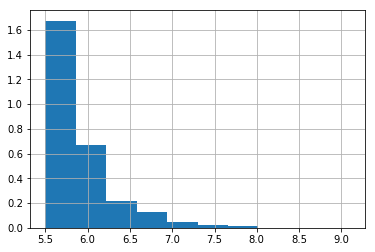

In [6]:
df.Magnitude.hist(normed=True)
plt.show()


O Histograma da magnitude da base de dados indica que há uma predominância na ocorrência de abalos de magnitude no valor de 5.5 MW, sendo que não há valores menores que 5.5 MW e que conforme o valor do abalo aumenta, a frequência diminui.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

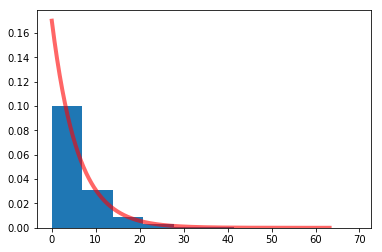

In [49]:
import matplotlib.pyplot as plt
from numpy import var, mean

plt.hist(X, normed = True)

mu=np.mean(df.Magnitude)
sigma=np.var(df.Magnitude)**(1/2)

loc, scale = (0,mu)
X = expon.rvs(loc,scale,len(df.Magnitude))
lista = np.arange(X.min(), X.max(), 0.1)

plt.plot(lista,expon.pdf(lista,loc,scale),'r-', lw=4, alpha=0.6, label='expon pdf')
plt.show()


O gráfico acima possui a linha da probabilidade P(X=x), sendo no eixo das abscissas o grau do abalo e no eixo das ordenadas em vermelho probabilidade de ocorrer.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
q3=pd.crosstab(df.Hemisferio,df.Type, normalize=True)
q3

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
prob_terremoto_N=q3["Earthquake"]["Norte"]
print(prob_terremoto_N)



0.447121134461


Como o crosstab está normalizado para os eventos ocorridos, a probabilidade será a própria célula.
Para 100% dos eventos, 44% corresponde a terremotos no hemisfério norte, portanto pode-se dizer que a probabilidade de ocorrer terremotos no Norte é 44%

Explique o seu raciocínio

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
soma_Norte=q3.sum(axis=1)["Norte"]
print(soma_Norte)
prob_Nuclear_N=q3["Nuclear Explosion"]["Norte"]/soma_Norte
print(prob_Nuclear_N)

0.453485392107
0.0138457191297


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [11]:
print("A probablidade de ter sido Nuclear Explosion é {0:.5f}".format(prob_Nuclear_N)) 

A probablidade de ter sido Nuclear Explosion é 0.01385


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

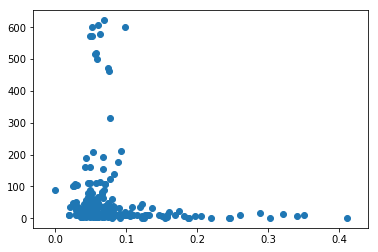

In [12]:
plt.scatter(df["Magnitude Error"],df["Depth"])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [13]:
c= df.Depth.corr(df["Magnitude Error"])
print(c)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

Como o valor da correlação está próximo de zero, pode-se dizer que há pouca correlação entre o erro da magnitude e a profundidade do evento.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


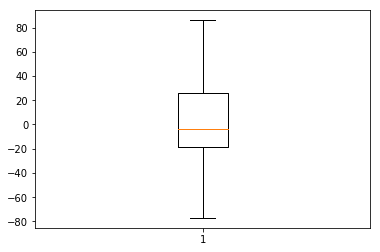

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


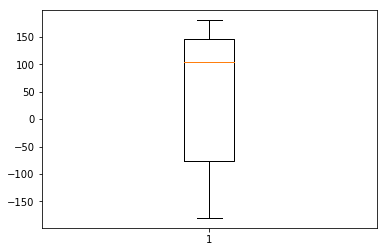

In [14]:
plt.boxplot(df.Latitude)
print(df.Latitude.describe())
plt.show()

plt.boxplot(df.Longitude)
print(df.Longitude.describe())
plt.show()

Comparando os boxplots, pode-se dizer que a mediana da Longitude é muito maior que a da Latitude, indicando que há mais eventos ocorrendo no oriente do planeta, mas com desvio padrão maior, o que indica que os valores estão mais espalhados.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [17]:
q6=pd.crosstab(df.Hemisferio,[df["Magnitude Type"]=="MB",df["Type"]=="Nuclear Explosion"], normalize=True)
print(q6)
print("É mais provável no norte.") if q6[1][1]["Norte"] > q6[1][1]["Sul"] else print("É mais provável no sul.")    

Magnitude Type     False               True           
Type               False     True      False     True 
Hemisferio                                            
Norte           0.381044  0.000513  0.066163  0.005766
Sul             0.457799  0.000000  0.087519  0.001196
É mais provável no norte.
